# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url="http://api.openweathermap.org/data/2.5/weather?"
key=f"appid={api_key}"


In [ ]:
# city="Los Angeles"

# full_url=f"{url}q={city}&{key}&units=metric"

# response = requests.get(full_url)
# data = response.json()
# pprint(data)


# City_Name=data["name"]
# Country=data["sys"]["country"]
# Date=data["dt"]
# Lat=data["coord"]["lat"]
# Lng=data["coord"]["lon"]
# Temp=data["main"]["temp_max"]
# Humid=data["main"]["humidity"]
# Cloud=data["clouds"]["all"]
# Wind_Speed=data["wind"]["speed"]

In [6]:
# set up lists to hold reponse info
City_Name = []
Country = []
Date = []
Lat = []
Lng = []
Temp = []
Humid = []
Cloud = []
Wind_Speed = []
count = 0
    
# Loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    weather_response = requests.get(f"{url}&q={city}&{key}&units=imperial")
    weather_data = weather_response.json()
    try:
        City_Name.append(weather_data['name'])
        Country.append(weather_data["sys"]["country"])
        Date.append(weather_data["dt"])
        Lat.append(weather_data["coord"]["lat"])
        Lng.append(weather_data["coord"]["lon"])
        Temp.append(weather_data["main"]["temp_max"])
        Humid.append(weather_data["main"]["humidity"])
        Cloud.append(weather_data["clouds"]["all"])
        Wind_Speed.append(weather_data["wind"]["speed"])
        count += 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("City not found. Skipping...") 
        pass
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | avarua
Processing record 2 of Set 1 | bluff
Processing record 3 of Set 1 | cape town
Processing record 4 of Set 1 | punta arenas
City not found. Skipping...
Processing record 5 of Set 1 | cap malheureux
Processing record 6 of Set 1 | ushuaia
Processing record 7 of Set 1 | lebu
Processing record 8 of Set 1 | sao jose da coroa grande
Processing record 9 of Set 1 | alice springs
Processing record 10 of Set 1 | necochea
Processing record 11 of Set 1 | airai
Processing record 12 of Set 1 | puerto ayacucho
Processing record 13 of Set 1 | katsuura
Processing record 14 of Set 1 | nioro
Processing record 15 of Set 1 | jamestown
Processing record 16 of Set 1 | la palma
Processing record 17 of Set 1 | namibe
City not found. Skipping...
City not found. Skipping...
Processing record 18 of Set 1 | rikitea
Processing record 19 of Set 1 | ribeira grande
Processing record 20 of Set 1 | carnarvon
Processing record 21 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df=pd.DataFrame({
    "City":City_Name,
    "Latitude":Lat, 
    "Longitude":Lng,
    "Max Temp":Temp,
    "Humidity":Humid,
    "Cloudiness":Cloud,
    "Wind Speed":Wind_Speed,
    "Country":Country, 
    "Date":Date
})

weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,80.60,74,63,5.82,CK,1588718375
1,Bluff,-46.60,168.33,53.51,76,97,24.74,NZ,1588718431
2,Cape Town,-33.93,18.42,66.00,88,89,9.17,ZA,1588718315
3,Punta Arenas,-53.15,-70.92,41.00,86,99,5.82,CL,1588718431
4,Cap Malheureux,-19.98,57.61,73.00,85,21,1.99,MU,1588718432


In [18]:
weather_df.to_csv("output_data/weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
mean=weather_df.mean()
mn=weather_df.min()
mx=weather_df.max()
ct=weather_df.count(0)
st=weather_df.std()
quartiles=weather_df.quantile([.25,.5,.75])

pd.DataFrame(mean)

,0
Latitude,1.863573e+01
Longitude,1.528742e+01
Max Temp,6.310927e+01
Humidity,6.892473e+01
Cloudiness,4.986738e+01
Wind Speed,8.499928e+00
Date,1.588718e+09


In [36]:
#  Get the indices of cities that have humidity over 100%.
bad_humid_df=weather_df.loc[weather_df["Humidity"]>=100]
bad_humid_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [37]:
#List of rows to remove by index
remove=list(bad_humid_df.index)

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_df.drop(remove,inplace=False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,80.60,74,63,5.82,CK,1588718375
1,Bluff,-46.60,168.33,53.51,76,97,24.74,NZ,1588718431
2,Cape Town,-33.93,18.42,66.00,88,89,9.17,ZA,1588718315
3,Punta Arenas,-53.15,-70.92,41.00,86,99,5.82,CL,1588718431
4,Cap Malheureux,-19.98,57.61,73.00,85,21,1.99,MU,1588718432


In [73]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("output_data/City_Data.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

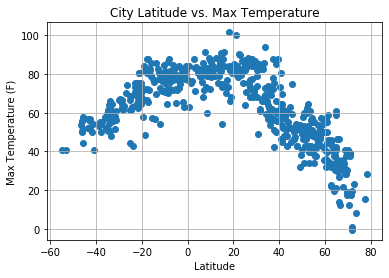

In [87]:
# Build scatter plot for latitude vs. temperature

latplot=clean_city_data["Latitude"]
tempplot=clean_city_data["Max Temp"]

plt.scatter(latplot,tempplot)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()


## Latitude vs. Humidity Plot

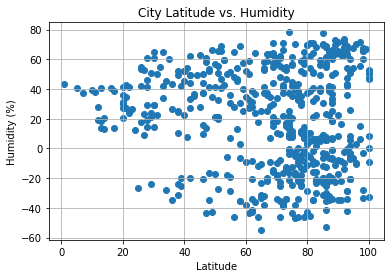

In [88]:
# Build scatter plot for latitude vs. humidity

humidplot=clean_city_data["Humidity"]

plt.scatter(humidplot,latplot)

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()


## Latitude vs. Cloudiness Plot

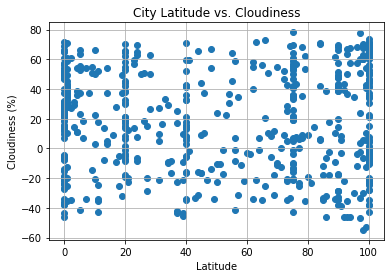

In [90]:
# Build scatter plot for latitude vs. cloudiness

cloudplot=clean_city_data["Cloudiness"]

plt.scatter(cloudplot,latplot)

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()


## Latitude vs. Wind Speed Plot

In [100]:
windplot.min(0)

0.18

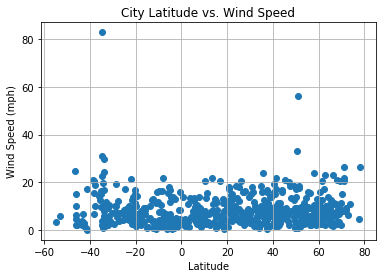

In [105]:
# Build scatter plot for latitude vs. wind speed

windplot=clean_city_data["Wind Speed"]

plt.scatter(latplot,windplot)

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [106]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, eq_loc):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,eq_loc,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    print(f"The correlation between latitude and {y_label} is: {rvalue}")

    plt.show()

In [109]:
# Create Northern and Southern Hemisphere DataFrames
North_Hemp=clean_city_data.loc[clean_city_data["Latitude"] >= 0]
South_Hemp=clean_city_data.loc[clean_city_data["Latitude"] < 0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression